## 데이터 불러오기 및 전처리(종속변수,독립변수 나누기/ train, test나누기)

In [1]:
# 붓꽃 품종 데이터를 이용해서 품종 분류하기
import pandas as pd
from sklearn.datasets import load_iris
## 붓꽃 품종 데이터
# - 품종 : setosa , versicolor, virginica
# - sepal length : 꽃받침 길이
# - speal width : 꽃받침 폭
# - petal length : 곷잎 길이
# - petal width : 꽃잎 폭

iris = load_iris()
print(iris)
###
# print(iris.DESCR)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [2]:
df = pd.DataFrame(data=iris.data, columns=['꽃받침 길이','꽃받침 폭','꽃잎 길이','꽃잎 폭'])
df['target'] = iris.target

In [3]:
df

,꽃받침 길이,꽃받침 폭,꽃잎 길이,꽃잎 폭,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
df.columns = ['꽃받침 길이','꽃받침 폭','꽃잎 길이','꽃잎 폭','품종']
df

,꽃받침 길이,꽃받침 폭,꽃잎 길이,꽃잎 폭,품종
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
df_x = df[['꽃받침 길이','꽃받침 폭','꽃잎 길이','꽃잎 폭']]
df_y = df['품종']

In [6]:
### 사용 패키지 불러들이기
from sklearn.model_selection import train_test_split

### 데이터 나누기
train_input , test_input, train_target, test_target = \
train_test_split(df_x,df_y,test_size = 0.25, random_state = 42)

### 차원 확인하기
print(train_input.shape)
print(train_target.shape)
print(test_input.shape)
print(test_target.shape)

(112, 4)
(112,)
(38, 4)
(38,)


In [7]:
### 정규화(표준화) : 스케일 표준화
# - 변수 : train_scaled, test_scaled
### 라이브러리 생성
from sklearn.preprocessing import StandardScaler

### 클래스(모델) 생성
scaler = StandardScaler()

### 스스로 표준점수 생성
scaler.fit(train_input,train_target)

### 훈련데이터를 표준점수로 변환하기
train_scaled = scaler.transform(train_input)
### 테스트데이터를 표준점수로 변환하기
test_scaled = scaler.transform(test_input)

### 샘플 5개 행 출력해보기
test_scaled[:5]

array([[ 0.33066442, -0.55192639,  0.51683569, -0.01918559],
       [-0.15985763,  1.7460571 , -1.21973223, -1.22787777],
       [ 2.29275265, -1.01152309,  1.79031883,  1.45810485],
       [ 0.20803391, -0.32212804,  0.4010645 ,  0.3837118 ],
       [ 1.18907802, -0.55192639,  0.57472129,  0.24941267]])

## 이진분류방식

#### 이진분류방식 - 독립변수 ALL

In [8]:
train_target_zero_one = train_target[(train_target == 0) | (train_target == 1)]
train_zero_one = train_scaled[(train_target == 0) | (train_target == 1)]
test_zero_one = test_scaled[(test_target == 0) | (test_target == 1)]
test_target_zero_one = test_target[(test_target == 0) | (test_target == 1)]

print(len(train_zero_one))
print(len(train_target_zero_one))
print(len(test_zero_one))
print(len(test_target_zero_one))

74
74
26
26


In [9]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_zero_one,train_target_zero_one)
print('훈련데이터 결정력 = ' , lr.score(train_zero_one,train_target_zero_one))
print('시험데이터 결정력 = ' , lr.score(test_zero_one,test_target_zero_one))

훈련데이터 결정력 =  1.0
시험데이터 결정력 =  1.0


In [10]:
# 상위 5개 예측과 실제값 비교
print('예측값 = ' , lr.predict(train_zero_one[:5]))
print('실제값 = ' , test_target_zero_one[:5])

예측값 =  [0 0 1 1 0]
실제값 =  73    1
18    0
78    1
76    1
31    0
Name: 품종, dtype: int32


In [11]:
# 예측확률
print(lr.predict_proba(train_zero_one[:5]))
print(lr.classes_)

[[0.98638718 0.01361282]
 [0.99584222 0.00415778]
 [0.04291844 0.95708156]
 [0.00889086 0.99110914]
 [0.98672414 0.01327586]]
[0 1]


In [12]:
# 계수 출력
print(lr.coef_, lr.intercept_)

[[ 0.9579382  -1.15499708  1.62543353  1.47075842]] [2.44655599]


In [13]:
# z값 조회하기
decisions = lr.decision_function(train_zero_one[:5])
z = decisions

# 0~1로 변환
from scipy.special import expit
print(expit(decisions))
print(decisions)

[0.01361282 0.00415778 0.95708156 0.99110914 0.01327586]
[-4.2830373  -5.47860689  3.10458708  4.71380033 -4.30844279]


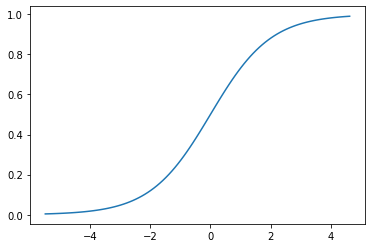

In [14]:
### 시그모이드 함수 예시

import numpy as np
import matplotlib.pyplot as plt
# z = np.sort(decisions)
z = np.arange(decisions.min(), decisions.max(), 0.1)
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.show()

## x축은 z 
## y축은 시그모이드 산출값

#### 이진분류방식 - 제일 낮은 독립변수 2개 선택

In [15]:
# 종속변수와의 상관관계 확인하기
df.corr().sort_values('품종', ascending = False)['품종'].head(7)

품종        1.000000
꽃잎 폭      0.956547
꽃잎 길이     0.949035
꽃받침 길이    0.782561
꽃받침 폭    -0.426658
Name: 품종, dtype: float64

In [16]:
df_x2 = df[['꽃받침 길이','꽃받침 폭']]
df_x2

,꽃받침 길이,꽃받침 폭
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [17]:
df_y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: 품종, Length: 150, dtype: int32

In [18]:
### 사용 패키지 불러들이기
from sklearn.model_selection import train_test_split

### 데이터 나누기
train_input , test_input, train_target, test_target = \
train_test_split(df_x2,df_y,test_size = 0.25, random_state = 42)

### 차원 확인하기
print(train_input.shape)
print(train_target.shape)
print(test_input.shape)
print(test_target.shape)

(112, 2)
(112,)
(38, 2)
(38,)


In [19]:
### 정규화(표준화) : 스케일 표준화
# - 변수 : train_scaled, test_scaled
### 라이브러리 생성
from sklearn.preprocessing import StandardScaler

### 클래스(모델) 생성
scaler = StandardScaler()

### 스스로 표준점수 생성
scaler.fit(train_input,train_target)

### 훈련데이터를 표준점수로 변환하기
train_scaled = scaler.transform(train_input)
### 테스트데이터를 표준점수로 변환하기
test_scaled = scaler.transform(test_input)

### 샘플 5개 행 출력해보기
test_scaled[:5]

array([[ 0.33066442, -0.55192639],
       [-0.15985763,  1.7460571 ],
       [ 2.29275265, -1.01152309],
       [ 0.20803391, -0.32212804],
       [ 1.18907802, -0.55192639]])

In [20]:
train_target_zero_one = train_target[(train_target == 0) | (train_target == 1)]
train_zero_one = train_scaled[(train_target == 0) | (train_target == 1)]
test_zero_one = test_scaled[(test_target == 0) | (test_target == 1)]
test_target_zero_one = test_target[(test_target == 0) | (test_target == 1)]

print(len(train_zero_one))
print(len(train_target_zero_one))
print(len(test_zero_one))
print(len(test_target_zero_one))

74
74
26
26


In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_zero_one,train_target_zero_one)
print('훈련데이터 결정력 = ' , lr.score(train_zero_one,train_target_zero_one))
print('시험데이터 결정력 = ' , lr.score(test_zero_one,test_target_zero_one))

훈련데이터 결정력 =  0.9864864864864865
시험데이터 결정력 =  1.0


In [22]:
# 상위 5개 예측과 실제값 비교
print('예측값 = ' , lr.predict(train_zero_one[:5]))
print('실제값 = ' , test_target_zero_one[:5])

예측값 =  [0 0 1 1 0]
실제값 =  73    1
18    0
78    1
76    1
31    0
Name: 품종, dtype: int32


In [23]:
# 예측확률
print(lr.predict_proba(train_zero_one[:5]))
print(lr.classes_)

[[0.9682958  0.0317042 ]
 [0.99265755 0.00734245]
 [0.32188135 0.67811865]
 [0.012772   0.987228  ]
 [0.96727429 0.03272571]]
[0 1]


In [33]:
# (해석) 제일 낮은 상관계수를 가진 독립변수 2개로하면 훈련데이터 결정력만 낮아져서 과소적합이 발생했다

## 다중분류

#### 독립변수(4개)일경우 과소적합이다

In [36]:
df = pd.DataFrame(data=iris.data, columns=['꽃받침 길이','꽃받침 폭','꽃잎 길이','꽃잎 폭'])
df['target'] = iris.target
df.columns = ['꽃받침 길이','꽃받침 폭','꽃잎 길이','꽃잎 폭','품종']

In [37]:
df_x = df[['꽃받침 길이','꽃받침 폭','꽃잎 길이','꽃잎 폭']]
df_y = df['품종']

In [38]:
### 사용 패키지 불러들이기
from sklearn.model_selection import train_test_split

### 데이터 나누기
train_input , test_input, train_target, test_target = \
train_test_split(df_x,df_y,test_size = 0.25, random_state = 42)

### 차원 확인하기
print(train_input.shape)
print(train_target.shape)
print(test_input.shape)
print(test_target.shape)

(112, 4)
(112,)
(38, 4)
(38,)


In [39]:
### 정규화(표준화) : 스케일 표준화
# - 변수 : train_scaled, test_scaled
### 라이브러리 생성
from sklearn.preprocessing import StandardScaler

### 클래스(모델) 생성
scaler = StandardScaler()

### 스스로 표준점수 생성
scaler.fit(train_input,train_target)

### 훈련데이터를 표준점수로 변환하기
train_scaled = scaler.transform(train_input)
### 테스트데이터를 표준점수로 변환하기
test_scaled = scaler.transform(test_input)

### 샘플 5개 행 출력해보기
test_scaled[:5]

array([[ 0.33066442, -0.55192639,  0.51683569, -0.01918559],
       [-0.15985763,  1.7460571 , -1.21973223, -1.22787777],
       [ 2.29275265, -1.01152309,  1.79031883,  1.45810485],
       [ 0.20803391, -0.32212804,  0.4010645 ,  0.3837118 ],
       [ 1.18907802, -0.55192639,  0.57472129,  0.24941267]])

In [40]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 20, max_iter = 1000)
lr.fit(train_scaled,train_target)
print('훈련 = ', lr.score(train_scaled,train_target))
print('실험 = ', lr.score(test_scaled,test_target))

훈련 =  0.9821428571428571
실험 =  1.0


#### 독립변수의 개수 5개로 하나의 파생변수 추가 => 그래도 과소적합임

In [41]:
df_x['꽃잎 폭*길이']= df_x['꽃잎 길이'] * df_x['꽃잎 폭']
df_x

,꽃받침 길이,꽃받침 폭,꽃잎 길이,꽃잎 폭,꽃잎 폭*길이
0,5.1,3.5,1.4,0.2,0.28
1,4.9,3.0,1.4,0.2,0.28
2,4.7,3.2,1.3,0.2,0.26
3,4.6,3.1,1.5,0.2,0.30
4,5.0,3.6,1.4,0.2,0.28
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,11.96
146,6.3,2.5,5.0,1.9,9.50
147,6.5,3.0,5.2,2.0,10.40
148,6.2,3.4,5.4,2.3,12.42


In [43]:
### 사용 패키지 불러들이기
from sklearn.model_selection import train_test_split

### 데이터 나누기
train_input , test_input, train_target, test_target = \
train_test_split(df_x,df_y,test_size = 0.25, random_state = 42)

### 차원 확인하기
print(train_input.shape)
print(train_target.shape)
print(test_input.shape)
print(test_target.shape)

(112, 5)
(112,)
(38, 5)
(38,)


In [44]:
### 정규화(표준화) : 스케일 표준화
# - 변수 : train_scaled, test_scaled
### 라이브러리 생성
from sklearn.preprocessing import StandardScaler

### 클래스(모델) 생성
scaler = StandardScaler()

### 스스로 표준점수 생성
scaler.fit(train_input,train_target)

### 훈련데이터를 표준점수로 변환하기
train_scaled = scaler.transform(train_input)
### 테스트데이터를 표준점수로 변환하기
test_scaled = scaler.transform(test_input)

### 샘플 5개 행 출력해보기
test_scaled[:5]

array([[ 0.33066442, -0.55192639,  0.51683569, -0.01918559, -0.04730262],
       [-0.15985763,  1.7460571 , -1.21973223, -1.22787777, -1.16025071],
       [ 2.29275265, -1.01152309,  1.79031883,  1.45810485,  2.1720851 ],
       [ 0.20803391, -0.32212804,  0.4010645 ,  0.3837118 ,  0.19351071],
       [ 1.18907802, -0.55192639,  0.57472129,  0.24941267,  0.18700224]])

In [45]:
lr = LogisticRegression(C = 20, max_iter = 1000)
lr.fit(train_scaled,train_target)
print('훈련 = ', lr.score(train_scaled,train_target))
print('실험 = ', lr.score(test_scaled,test_target))

훈련 =  0.9821428571428571
실험 =  1.0


#### 폴리노말 사이킷런 변환기 사용 => 해도 똑같다(과소적합임)

In [46]:
### 사이킷런 변환기 클래스
from sklearn.preprocessing import PolynomialFeatures
### train_input, test_input 데이터 변환하기 ...
## 객체생성(모델)
poly = PolynomialFeatures(degree = 5, include_bias = False)

### 훈련시키기 : 새롭게 만들 스스로 특성 조합 찾기
poly.fit(train_input)

### 찾은 특성 조합으로 데이터 변환하기
# - 훈련데이터 변환하기
train_poly = poly.transform(train_input)

# - 테스트데이터 변환하기
test_poly = poly.transform(test_input)

print(train_poly.shape , test_poly.shape)

(112, 251) (38, 251)


In [47]:
### 정규화(표준화) : 스케일 표준화
# - 변수 : train_scaled, test_scaled
### 라이브러리 생성
from sklearn.preprocessing import StandardScaler

### 클래스(모델) 생성
scaler = StandardScaler()

### 스스로 표준점수 생성
scaler.fit(train_poly,train_target)

### 훈련데이터를 표준점수로 변환하기
train_scaled = scaler.transform(train_poly)
### 테스트데이터를 표준점수로 변환하기
test_scaled = scaler.transform(test_poly)

### 샘플 5개 행 출력해보기
test_scaled[:5]

array([[ 0.33066442, -0.55192639,  0.51683569, ..., -0.49945929,
        -0.48594622, -0.47118354],
       [-0.15985763,  1.7460571 , -1.21973223, ..., -0.55442832,
        -0.52918818, -0.50484829],
       [ 2.29275265, -1.01152309,  1.79031883, ...,  3.94466005,
         4.66658885,  5.43351825],
       [ 0.20803391, -0.32212804,  0.4010645 , ..., -0.40718871,
        -0.4182915 , -0.42218738],
       [ 1.18907802, -0.55192639,  0.57472129, ..., -0.42786919,
        -0.42751251, -0.42400803]])

In [48]:
lr = LogisticRegression(C = 20, max_iter = 1000)
lr.fit(train_scaled,train_target)
print('훈련 = ', lr.score(train_scaled,train_target))
print('실험 = ', lr.score(test_scaled,test_target))

훈련 =  0.9821428571428571
실험 =  1.0
